In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
from sklearn.model_selection import KFold, cross_val_score

In [53]:
df = pd.read_csv('train.csv')

In [54]:
pd.options.display.max_rows = 85

In [55]:
pd.options.display.max_columns = 85

In [56]:
df.shape

(2051, 81)

In [57]:
df.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [58]:
df['Mas Vnr Area'].max()

1600.0

In [59]:
df[df['Mas Vnr Area'].isna()] #Masonry Veneer is a strong indicator of housing quality, so it's in our interest to drop these rows or rename them to None/0 to run them


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
22,2393,528142010,60,RL,103.0,12867,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,Unf,0.0,Unf,0.0,1209.0,1209.0,GasA,Ex,Y,SBrkr,1209,1044,0,2253,0.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2005.0,Fin,2.0,575.0,TA,TA,Y,243,142,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,344133
41,2383,528110050,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3.0,850.0,TA,TA,Y,216,229,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,465000
86,539,531371050,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,184900
212,518,528458020,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,NaN,NaN,NaN,0,10,2009,New,225000
276,2824,908130020,20,RL,75.0,8050,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,TA,TA,PConc,Gd,TA,Av,GLQ,475.0,ALQ,297.0,142.0,914.0,GasA,Ex,Y,SBrkr,914,0,0,914,1.0,0.0,1,0,2,1,Gd,4,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,32,0,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,117250
338,1800,528458150,60,FV,112.0,12217,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2007,2007,Hip,CompShg,WdShing,Wd Shng,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,GLQ,745.0,Unf,0.0,210.0,955.0,GasA,Ex,Y,SBrkr,955,925,0,1880,1.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2007.0,Fin,3.0,880.0,TA,TA,Y,168,127,0,0,0,0,NaN,NaN,NaN,0,12,2007,New,310013
431,1455,907251090,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804.0,Unf,0.0,324.0,1128.0,GasA,Ex,Y,SBrkr,1128,903,0,2031,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2.0,577.0,TA,TA,Y,0,211,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,237000
451,1120,528439010,20,RL,87.0,10037,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,1460.0,GasA,Ex,Y,SBrkr,1460,0,0,1460,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,Fin,2.0,480.0,TA,TA,Y,0,20,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD,247000
591,1841,533208040,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106.0,Unf,0.0,135.0,1241.0,GasA,Ex,Y,SBrkr,1241,0,0,1241,1.0,0.0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2.0,569.0

In [60]:
df.dropna(subset=['Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area', 'BsmtFin SF 1', 'Mas Vnr Area', 'Mas Vnr Type'], inplace = True)
#these have small sets of values with null values that can easily be afforded to be dropped for cleaner data 


In [61]:
#df.dropna(subset=['Mas Vnr Type', 'Mas Vnr Area'], inplace = True)

In [62]:
df[df['Garage Type'].isna()] # These are very likely 0 values because there is no Garage

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
28,2243,911103060,190,C (all),75.0,8250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,2fmCon,2Story,5,6,1895,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,957.0,957.0,GasA,Fa,N,SBrkr,1034,957,0,1991,0.0,0.0,2,0,4,2,TA,9,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,133,0,0,0,NaN,NaN,NaN,0,6,2007,WD,119600
53,330,923226250,160,RM,21.0,1476,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,176.0,Unf,0.0,370.0,546.0,GasA,Ex,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,200,26,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,76000
65,2278,923202134,20,RL,70.0,8402,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Feedr,Norm,1Fam,1Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,ALQ,206.0,Unf,0.0,914.0,1120.0,GasA,Ex,Y,SBrkr,1120,0,0,1120,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,30,0,0,0,0,NaN,NaN,NaN,0,12,2007,New,147000
79,2235,910201050,50,RM,50.0,7288,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1925,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,Gd,BrkTil,TA,Po,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,665,0,1601,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,176,0,0,NaN,NaN,NaN,0,9,2007,WD,129850
101,2084,905476170,30,RL,58.0,9098,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,7,1920,2002,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,Mn,ALQ,348.0,Unf,0.0,180.0,528.0,GasA,Ex,Y,SBrkr,605,0,0,605,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,144,0,0,0,NaN,NaN,NaN,0,7,2007,WD,86000
103,728,902477130,30,C (all),72.0,9392,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,3,1900,1950,Mansard,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,CBlock,Fa,TA,No,Unf,0.0,Unf,0.0,245.0,245.0,GasA,TA,N,SBrkr,797,0,0,797,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,36,94,0,0,0,NaN,NaN,NaN,0,9,2009,WD,44000
114,781,905228050,20,RL,NaN,9000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,2,2,1947,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,SBrkr,660,0,0,660,0.0,0.0,1,0,2,1,Fa,5,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,100,0,0,0,NaN,NaN,NaN,0,6,2009,WD,63900
120,1492,908127120,30,RL,63.0,13907,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1940,1969,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,290.0,Unf,0.0,706.0,996.0,GasA,Ex,Y,SBrkr,996,0,0,996,1.0,0.0,1,0,3,1,TA,6,Typ,1,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,144,0,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,108000
134,1514,909100170,30,RL,67.0,5604,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1925,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,Unf,0.0,396.0,864.0,GasA,TA,N,FuseA,864,0,0,864,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,96,0,0,0,NaN,NaN,NaN,0,4,2008,WD,98000
136,216,905

In [63]:
df[df['Lot Frontage'].isna()]  #These are missing values - most of the Lot Area values seem listed.  Could remove these whole values

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000.0,Unf,0.0,188.0,1188.0,GasA,Fa,Y,SBrkr,1188,0,0,1188,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1959.0,RFn,2.0,531.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,292.0,Unf,0.0,632.0,924.0,GasA,TA,Y,SBrkr,924,0,0,924,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1952.0,Unf,1.0,420.0,TA,TA,Y,0,324,0,0,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
23,12,527165230,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NaN,GdPrv,Shed,500,3,2010,WD,185000
27,1534,909277040,50,RL,NaN,11700,Pave,Grvl,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,5,6,1937,1995,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,606.0,Unf,0.0,336.0,942.0,GasA,Ex,Y,SBrkr,1265,673,0,1938,0.0,0.0,2,0,4,1,Gd,7,Min2,1,Gd,Detchd,1937.0,Unf,1.0,240.0,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,198000
31,2860,909276010,70,RL,NaN,11435,Pave,NaN,IR1,HLS,AllPub,Corner,Mod,Crawfor,Norm,Norm,1Fam,2Story,8,7,1929,1950,Gable,CompShg,BrkFace,Stucco,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,792.0,792.0,GasA,Fa,Y,SBrkr,792,725,0,1517,0.0,0.0,1,0,3,1,Gd,7,Typ,2,Gd,Detchd,1931.0,Unf,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,230000
42,983,923275040,85,RL,NaN,9101,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,6,1978,1978,Gable,CompShg,Plywood,Plywood,BrkFace,104.0,TA,Gd,PConc,Gd,TA,Av,GLQ,1097.0,Unf,0.0,0.0,1097.0,GasA,Ex,Y,SBrkr,1110,0,0,1110,1.0,0.0,1,0,1,1,Gd,4,Typ,1,TA,Attchd,1978.0,Fin,2.0,602.0,TA,TA,Y,303,30,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,165500
50,2511,533221080,160,FV,NaN,2998,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,6,5,2000,2000,Gable,CompShg,MetalSd,MetalSd,BrkFace,513.0,Gd,TA,PConc,Gd,TA,No,GLQ,353.0,Unf,0.0,403.0,756.0,GasA,Ex,Y,SBrkr,768,756,0,1524,0.0,0.0,2,1,2,1,Gd,4,Typ,0,NaN,Detchd,2000.0,Unf,2.0,440.0,TA,TA,Y,0,32,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,166000
59,997,527107010,60,RL,NaN,15038,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1996,1996,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Rec,138.0,Unf,0.0,778.0,916.0,GasA,Gd,Y,SBrkr,916,720,0,1636,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1996.0,Fin,2.

In [64]:
#df[df['Garage Type'].map(replace('NaN', 'Na'))

In [65]:
df.dropna(axis = 1, thresh = 500, inplace = True)

In [66]:
df.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       324
Lot Area             0
Street               0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type         0
Mas Vnr Area         0
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           53
Bsmt Cond           53
Bsmt Exposure       56
BsmtFin Type 1      53
BsmtFin SF 1         0
BsmtFin Type 2      54
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Heating              0
Heating QC           0
Central Air          0
Electrical           0
1st Flr SF 

In [67]:
df.drop(columns=['Fireplace Qu'], inplace = True) #998 missing values is pretty big and could mean this column  is biased)

<h1>FEATURE ENGINEERING</h1>

In [68]:
df['Garage_Interaction'] = df['Garage Area']*df['Garage Cars']
df['Total_Bldg_SF'] = df['Total Bsmt SF'] + df['1st Flr SF'] + df['2nd Flr SF'] + df['Open Porch SF'] + df['Wood Deck SF'] +df['Mas Vnr Area'] 

In [69]:
#df.dropna(subset=['name', 'born'], inplace = True)

In [70]:
holdout = pd.read_csv('test.csv') # YOU MUST DO SEPARATE CLEANUP ON THE HOLDOUT 

In [71]:
holdout.dropna(subset=['Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area', 'BsmtFin SF 1', 'Mas Vnr Area', 'Mas Vnr Type'], inplace = True)
holdout.dropna(axis = 1, thresh = 500, inplace = True)
#holdout.drop(columns=['Fireplace Qu'], inplace = True) 


In [72]:
holdout['Garage_Interaction'] = holdout['Garage Area']*holdout['Garage Cars']
holdout['Total_Bldg_SF'] = holdout['Total Bsmt SF'] + holdout['1st Flr SF'] + holdout['2nd Flr SF'] + holdout['Open Porch SF'] + df['Wood Deck SF'] +df['Mas Vnr Area'] 

In [73]:
holdout.dropna(subset=['Total_Bldg_SF'], inplace = True)

In [74]:
holdout.isnull().sum()

Id                      0
PID                     0
MS SubClass             0
MS Zoning               0
Lot Frontage          158
Lot Area                0
Street                  0
Lot Shape               0
Land Contour            0
Utilities               0
Lot Config              0
Land Slope              0
Neighborhood            0
Condition 1             0
Condition 2             0
Bldg Type               0
House Style             0
Overall Qual            0
Overall Cond            0
Year Built              0
Year Remod/Add          0
Roof Style              0
Roof Matl               0
Exterior 1st            0
Exterior 2nd            0
Mas Vnr Type            0
Mas Vnr Area            0
Exter Qual              0
Exter Cond              0
Foundation              0
Bsmt Qual              24
Bsmt Cond              24
Bsmt Exposure          24
BsmtFin Type 1         24
BsmtFin SF 1            0
BsmtFin Type 2         24
BsmtFin SF 2            0
Bsmt Unf SF             0
Total Bsmt S

In [75]:
df['Garage_Interaction'] = df['Garage Area']*df['Garage Cars']

In [76]:
df.drop(columns=['Garage Area', 'Garage Cars'], inplace = True) 

In [77]:

df['Total_Bldg_SF'] = df['Total Bsmt SF'] + df['1st Flr SF'] + df['2nd Flr SF'] + df['Open Porch SF'] + df['Wood Deck SF'] +df['Mas Vnr Area'] 

In [123]:
X = df[['Overall Qual', 'Gr Liv Area', 'Garage_Interaction', 'Total_Bldg_SF', 'Year Built', 'Year Remod/Add', 
        'Full Bath', 'TotRms AbvGrd', 'Fireplaces', 'PID', 'Enclosed Porch', 'Half Bath']]



In [124]:
#X = df[['Overall Qual', 'Gr Liv Area', 'Garage_Interaction', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath', 'TotRms AbvGrd', 'Fireplaces', 'PID', 'Enclosed Porch', 'Open Porch SF', 
#       'Wood Deck SF', 'Half Bath', '2nd Flr SF', 'Mas Vnr Area']] Before swapping SF variables for Total_Bldg_SF


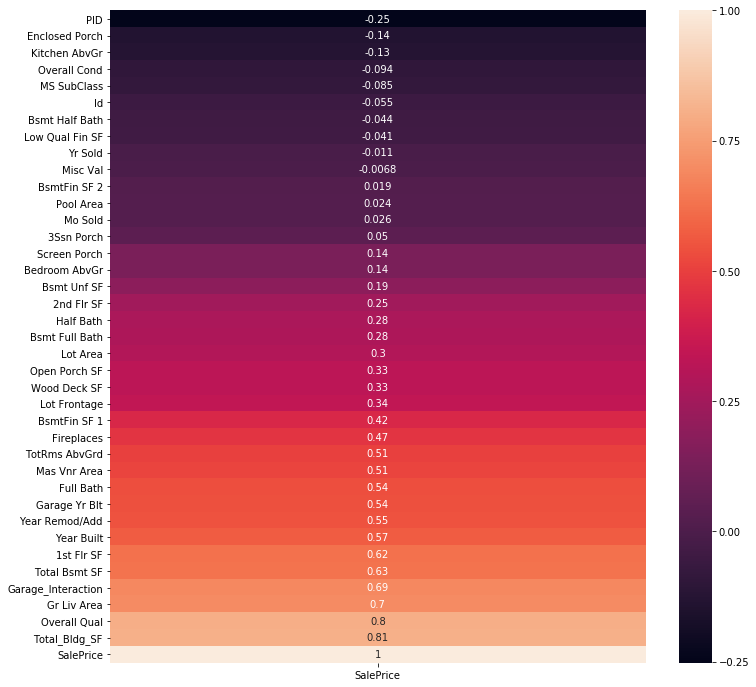

In [125]:
plt.subplots(figsize = (12, 12))
sns.heatmap(df.corr()[['SalePrice']].sort_values('SalePrice'), annot= True)

In [126]:
X.isna().sum()

Overall Qual          0
Gr Liv Area           0
Garage_Interaction    0
Total_Bldg_SF         0
Year Built            0
Year Remod/Add        0
Full Bath             0
TotRms AbvGrd         0
Fireplaces            0
PID                   0
Enclosed Porch        0
Half Bath             0
dtype: int64

In [127]:
#X = df.loc[:, ['Gr Liv Area', 'Year Built', 'Full Bath']]
y = df['SalePrice']

In [128]:
X.shape

(2026, 12)

In [129]:
X

,Overall Qual,Gr Liv Area,Garage_Interaction,Total_Bldg_SF,Year Built,Year Remod/Add,Full Bath,TotRms AbvGrd,Fireplaces,PID,Enclosed Porch,Half Bath
0,6,1479,950.0,2537.0,1976,2005,2,6,0,533352170,0,1
1,7,2122,1118.0,3241.0,1996,1997,2,8,1,531379050,0,1
2,5,1057,246.0,2166.0,1953,2007,1,5,0,535304180,0,0
3,5,1444,800.0,1928.0,2006,2007,2,7,0,916386060,0,1
4,6,1445,968.0,2180.0,1900,1993,2,6,0,906425045,0,0
5,6,1888,1156.0,3405.0,1966,2002,2,6,1,535126040,0,1
6,6,1072,1050.0,1745.0,2005,2006,2,5,0,908186070,0,0
7,5,1188,1062.0,2556.0,1959,1959,1,6,0,535154050,0,0
8,5,924,420.0,2172.0,1952,1952,1,6,0,535353130,0,0
9,5,2080,1008.0,3647.0,1969,1969,1,9,2,535426130,0,2


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [131]:
ss = StandardScaler()
ss.fit(X_train) 
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)  #Is this ok??  Do I need the unscaled training data after this?

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [132]:
holdout_scaled = ss.transform(holdout[['Overall Qual', 'Gr Liv Area', 'Garage_Interaction', 'Total_Bldg_SF', 'Year Built', 'Year Remod/Add', 
        'Full Bath', 'TotRms AbvGrd', 'Fireplaces', 'PID', 'Enclosed Porch', 'Half Bath']])
                                      

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [133]:
df.corr()[['SalePrice']].sort_values('SalePrice')

,SalePrice
PID,-0.252480
Enclosed Porch,-0.138048
Kitchen AbvGr,-0.126232
Overall Cond,-0.094233
MS SubClass,-0.085339
Id,-0.055072
Bsmt Half Bath,-0.043856
Low Qual Fin SF,-0.041153
Yr Sold,-0.011046
Misc Val,-0.006787


In [134]:
#plt.scatter(X['Overall Qual'], y)

In [135]:
#plt.subplots(figsize = (40, 40))
#sns.heatmap(df.corr(), annot = True)

In [136]:
#plt.subplots(20, 20)
#sns.heatmap(X.corr(), annot = True)


In [137]:
print('X training data shape is', X_train.shape)
print('X testing data shape is', X_test.shape)
print('y training data shape is', y_train.shape)
print('y testing data shape is', y_test.shape)
print('holdout scaled shape is', holdout_scaled.shape)

X training data shape is (1519, 12)
X testing data shape is (507, 12)
y training data shape is (1519,)
y testing data shape is (507,)
holdout scaled shape is (867, 12)


In [138]:
lr = LinearRegression()
lr.fit(X_train, y_train)
cv_scores = cross_val_score(lr, X_train, y_train, cv=8)
preds = lr.predict(holdout_scaled)

In [139]:
preds[:10]

array([152940.78080969, 192169.22995456, 200082.5952228 , 129367.9103802 ,
       185804.73925809,  86241.8903593 , 108959.33573718, 134155.61401364,
       203902.2493595 , 194671.10892968])

In [140]:
sub = holdout[['Id']]

In [141]:
sub['SalePrice'] = preds

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [142]:
sub.shape

(867, 2)

In [147]:
print('cv score', cross_val_score(lr, X_train, y_train, cv=10).mean())
print('train score', lr.score(X_train, y_train))
print('test score', lr.score(X_test,y_test))

cv score 0.7663687211249369
train score 0.7957255017713829
test score 0.8439865416483142


In [148]:
#Removing Gr living area at this point hardly changes my model 

In [149]:
print('cv score', cross_val_score(lr, X_train, y_train, cv=10).mean())
print('train score', lr.score(X_train, y_train))
print('test score', lr.score(X_test,y_test))

cv score 0.7663687211249369
train score 0.7957255017713829
test score 0.8439865416483142


In [146]:
#print('cv score', cross_val_score(lr, X_train, y_train, cv=10).mean())
#print('train score', lr.score(X_train, y_train))
#print('test score', lr.score(X_test,y_test))

In [ ]:
sub.to_csv('kaggle_sub_7.csv', index=False)